# HW5 

http://matplotlib.org/examples/ - A gallery of examples

https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Q1 

This dataset is a record of all the crime that was reported in Philly.

What hour of the day (24 hr day) is the "most dangerous"?

In [ ]:
 crimes = pd.read_csv("", low_memory = False)

In [ ]:
crimes_data = crimes.groupby("hour_", as_index = False).agg({"dc_key":"count"})

In [ ]:
# crimes_data.sort_values("dc_key", ascending = False) to check which was the most dangerous hour

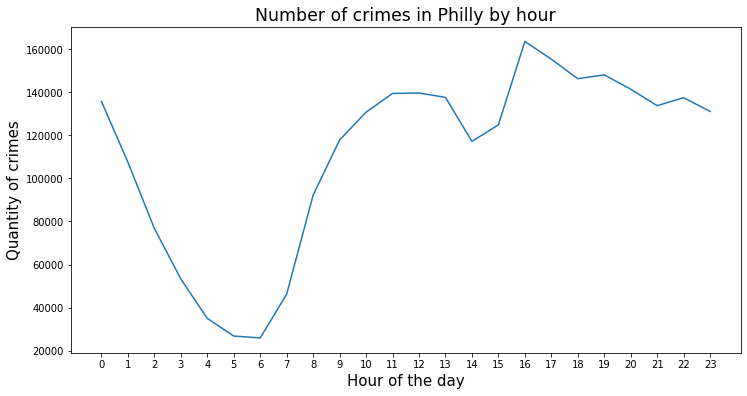

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(crimes_data["hour_"],crimes_data["dc_key"])
plt.xticks(np.arange(0,24))
plt.title("Number of crimes in Philly by hour", size = 'xx-large')
plt.xlabel("Hour of the day", fontsize = 15)
plt.ylabel("Quantity of crimes", fontsize = 15);

## Answer: the most dangerous hour is 16 hs.

## Q2

Using the Philadelphia education dataset, a bar graph which represents average enrollment by zipcode. 

In [ ]:
schools.columns

Index(['X', 'Y', 'OBJECTID', 'AUN', 'SCHOOL_NUM', 'LOCATION_ID', 'SCHOOL_NAME',
       'SCHOOL_NAME_LABEL', 'STREET_ADDRESS', 'ZIP_CODE', 'PHONE_NUMBER',
       'ACTIVE', 'GRADE_LEVEL', 'GRADE_ORG', 'ENROLLMENT', 'TYPE',
       'TYPE_SPECIFIC'],
      dtype='object')

In [ ]:
schools_enroll = schools.groupby("ZIP_CODE", as_index = False).agg(avg_enroll = ("ENROLLMENT" , "mean"))

In [ ]:
schools_enroll.head()

,ZIP_CODE,avg_enroll
40,19149,1270.400000
7,19115,1229.666667
5,19111,1123.000000
8,19116,1069.000000
27,19136,1062.400000


In [ ]:
schools_enroll_new = schools_enroll[schools_enroll["ZIP_CODE"] != 19107] #took it out because it had NaN enrollment

In [ ]:
def make_string(x):
  y = str(x)
  return y #to make the zip codes strings (when they were int they would not work with the bar plot)

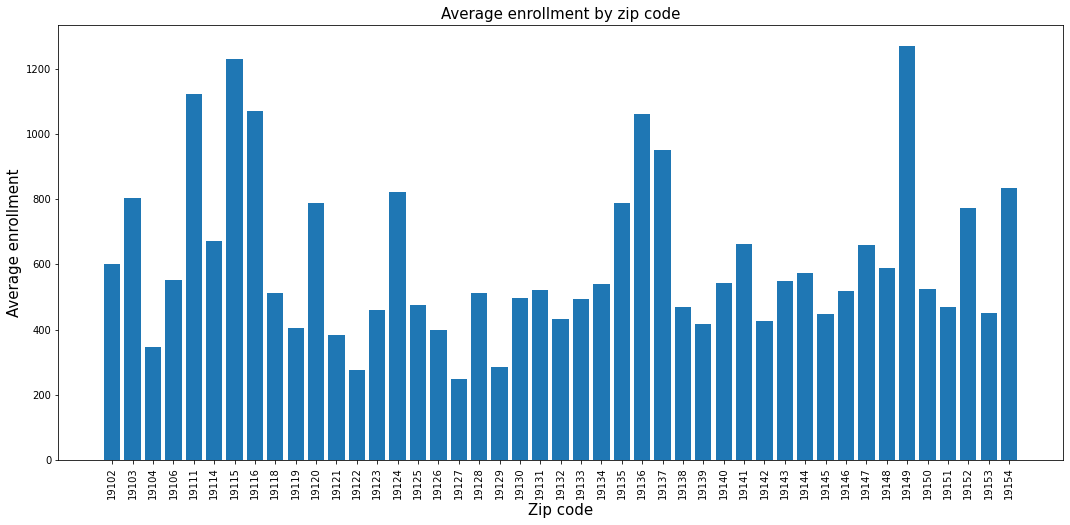

In [ ]:
fig = plt.figure(figsize = (18,8))
plt.title("Average enrollment by zip code", fontsize = 15)
plt.bar(x = schools_enroll_new["ZIP_CODE"].apply(make_string), height = schools_enroll_new["avg_enroll"])
plt.xticks(np.arange(0, len(schools_enroll_new)), rotation= 90)
plt.xlabel("Zip code", fontsize = 15)
plt.ylabel("Average enrollment", fontsize = 15);

## Q4

Data viz

Data from - https://corgis-edu.github.io/corgis/csv/



In [ ]:
emissions_data = pd.read_csv("emissions.csv")

In [ ]:
emissions_data.head()

,Country,Year,Emissions.Type.CO2,Emissions.Type.N2O,Emissions.Type.CH4,Emissions.Sector.Power Industry,Emissions.Sector.Buildings,Emissions.Sector.Transport,Emissions.Sector.Other Industry,Emissions.Sector.Other sectors,Ratio.Per GDP,Ratio.Per Capita
0,Afghanistan,1970,2670.0,1820.0,12800.0,0.06,0.58,0.23,0.07,0.53,1.557705,0.0
1,Afghanistan,1971,2630.0,1850.0,12900.0,0.06,0.58,0.23,0.07,0.53,1.517670,0.0
2,Afghanistan,1972,2180.0,1810.0,11900.0,0.12,0.46,0.27,0.05,0.61,1.357590,0.0
3,Afghanistan,1973,2310.0,1830.0,11600.0,0.17,0.57,0.24,0.02,0.47,1.307901,0.0
4,Afghanistan,1974,2520.0,2190.0,12800.0,0.21,0.77,0.24,0.03,0.65,1.425016,0.0


In [ ]:
np.unique(emissions_data['Year']) #to know since what year

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])

In [ ]:
total_data = emissions_data.groupby("Country", as_index = False).agg(total_emissions = ('Emissions.Type.CO2','sum')).sort_values('total_emissions',ascending = False)[0:10]

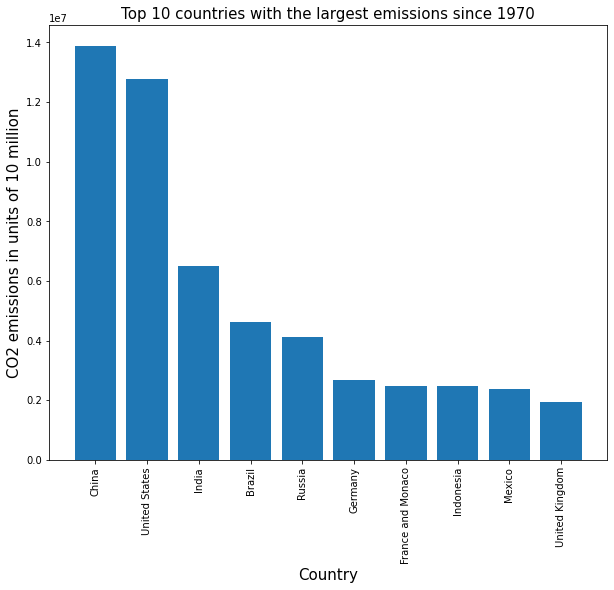

In [ ]:
fig = plt.figure(figsize = (10,8))
plt.title("Top 10 countries with the largest emissions since 1970", fontsize = 15)
plt.bar(x = total_data["Country"], height = total_data["total_emissions"])
plt.xticks(np.arange(0, len(total_data)), rotation= 90) #rotation = 0 looks bad
plt.xlabel("Country", fontsize = 15)
plt.ylabel("CO2 emissions in units of 10 million", fontsize = 15);

## Exploring the top 10 countries that have emitted the most CO2 since 1970.